In [1]:
import numpy as np

def rect(x, B):
    '''
    Create a rectangle function;
    returns a numpy array that is 1 if|x|<w and 0 if |x|>w
    B is the rectangle width centered at 0, x is the number of points in the array
    '''
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]
        
    return rect

<IPython.core.display.Javascript object>


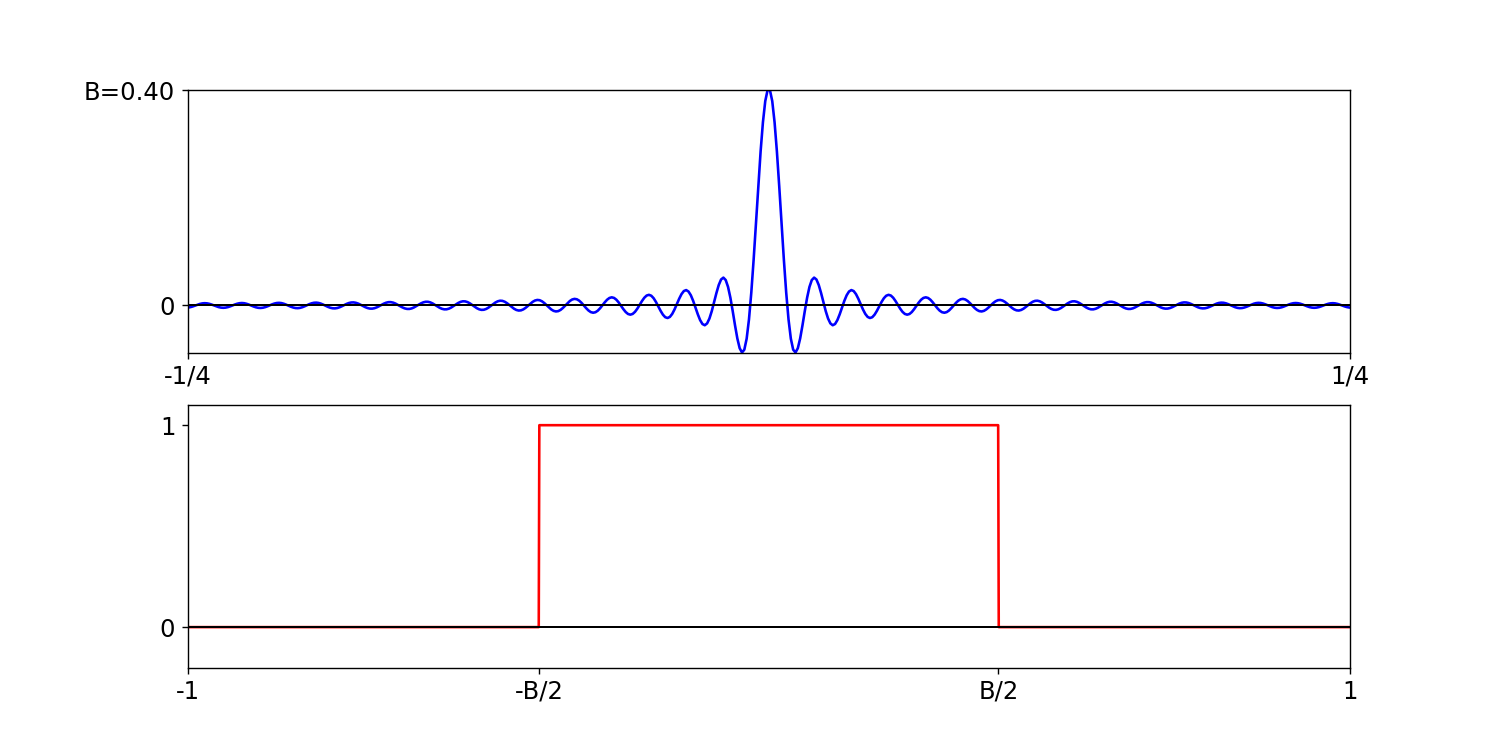

In [8]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants and x array
pi = np.pi
length = 2000 # number of points
x = np.linspace(-1, 1, length)
#print(x)

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))
sinc, = ax1.plot(x, np.sin(x), 'b')
box, = ax2.plot(x, np.sin(x), 'r')

def animate(B):
    '''
    this function gets called by FuncAnimation,
    each time called, it will replot with a different width "B"
    
    B: rect width
    returns:
        sinc: ydata
        box: ydata
    '''
    f = rect(len(x), B)
    box.set_ydata(f)
    
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    ax1.set_ylim(np.min(F), np.max(F))
    plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'], yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format(B / length)])
    
    plt.setp(ax2, yticks=[0,1], xticks=[-1, -1 *B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', 1])
    
def init():
    '''
    initialize the figure
    '''
    ax2.set_ylim(-0.2, 1.1)
    ax1.set_xlim(-0.25, 0.25)
    ax2.set_xlim(-1, 1)
    ax1.axhline(0, color='black', lw=1)
    ax2.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size': 14})
    
    return sinc, box,

step = 10
steps =np.arange(10, 1000, step)
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()